# EDA & Modelling

## Package loading

In [2]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation
from polylearn import PolynomialNetworkRegressor
from polylearn import FactorizationMachineRegressor
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping


## Exploratory Data Analysis 

### File and parameters loading

In [3]:
problem_type = 'regression'

In [4]:
stacking = 'False'

In [5]:
data_size = 'small'

In [6]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.6/dataset/concrete_data.csv')

In [7]:
target_col = 'Strength'

In [8]:
user_drop_cols = []

In [9]:
threshold_NaN = 0.5

In [10]:
threshold_cat = 3

In [11]:
threshold_Z = 3.0

### Dataset Information

In [12]:
df.shape

(1030, 9)

#### Some records

In [13]:
display(df)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


#### Dataframe structure

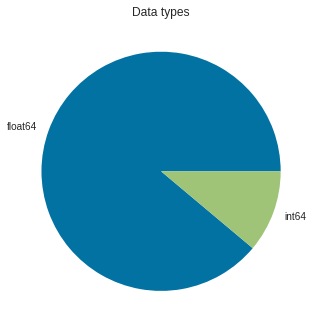

In [14]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [15]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### Which columns could be categorical ?

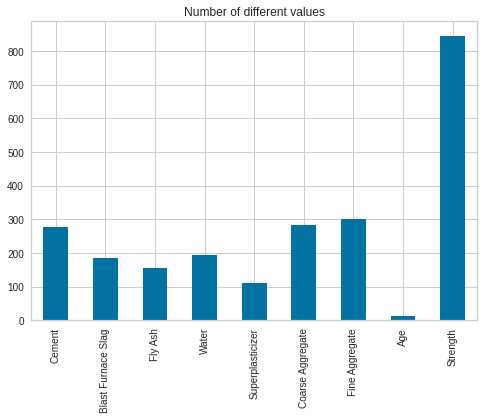

In [16]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [17]:
duplicates(df)

Number of rows before removing: 1030
Number of duplicate rows: 25
Number of rows after removing: 1005


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


#### Drop user's columns:

In [18]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [19]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [20]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [21]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [22]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [23]:
df, encoded_cols = encoding(df, threshold_cat)

Encoding numeric column: Cement
Encoding numeric column: Blast Furnace Slag
Encoding numeric column: Fly Ash
Encoding numeric column: Water
Encoding numeric column: Superplasticizer
Encoding numeric column: Coarse Aggregate
Encoding numeric column: Fine Aggregate
Encoding numeric column: Age
Encoding numeric column: Strength


#### Imputing NaN using IterativeImputer

No handles with labels found to put in legend.


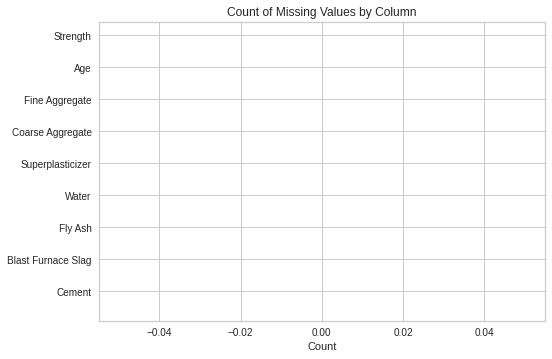

In [24]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [25]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [26]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.07MB
Memory usage after optimization is: 0.02MB
Decreased by 74.9%


##### Dataframe structure after compression

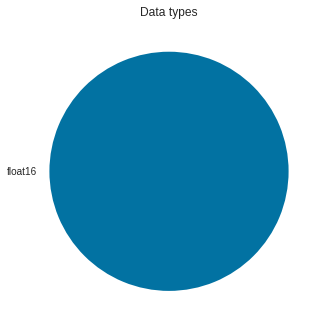

In [27]:
plot_dataframe_structure(df)

#### Outliers:

In [28]:
df = outliers(df, threshold_Z)

Using Z_score,  49  rows will be suppressed.


#### Splitting dataframe in features and targets

In [29]:
y = df[target_col]

In [30]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

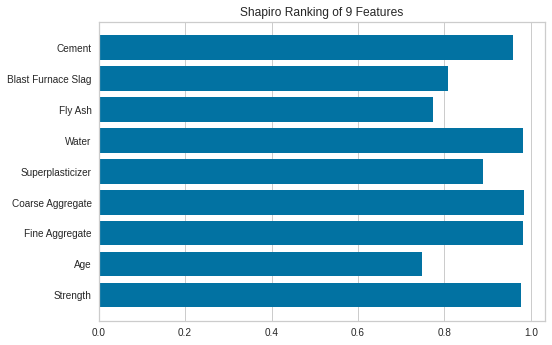

In [31]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

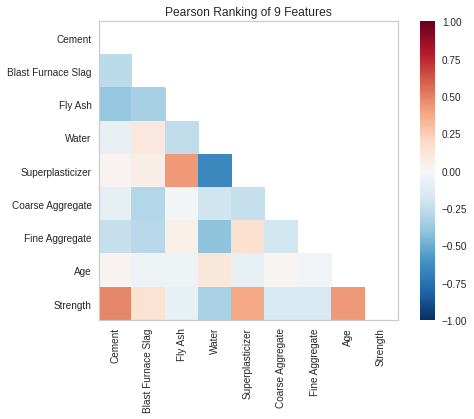

In [32]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

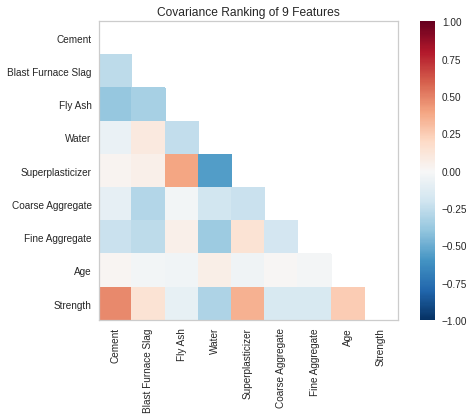

In [33]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

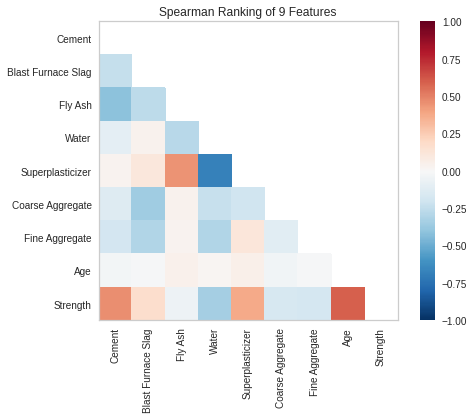

In [34]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

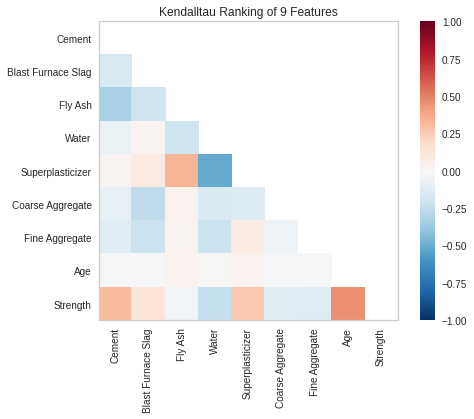

In [35]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

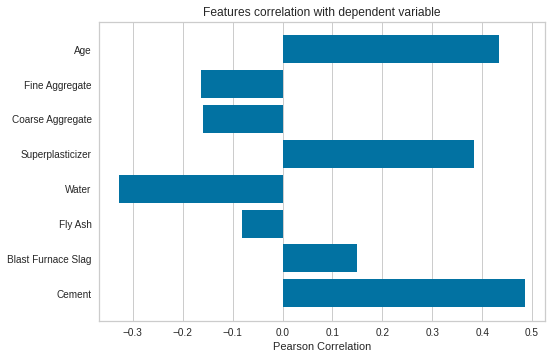

In [36]:
feature_correlation(X, y);

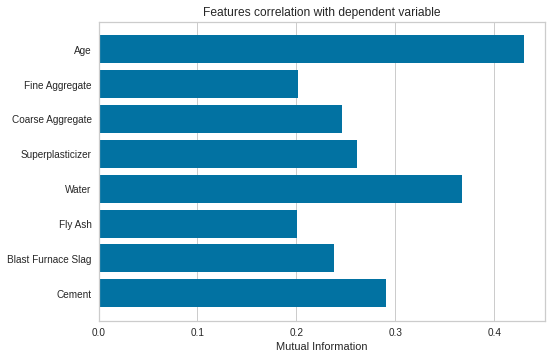

In [37]:
feature_correlation(X, y, method='mutual_info-regression');

#### Feature importance (a priori)

##### According to decision tree

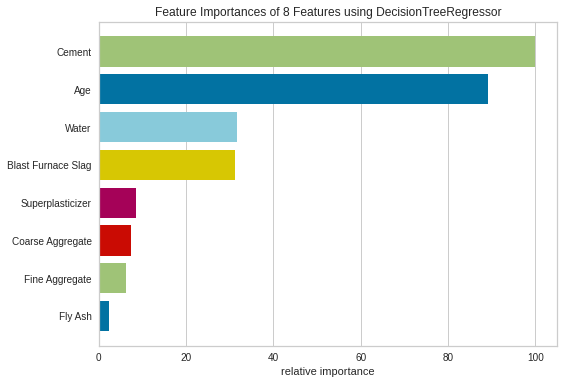

In [38]:
feature_importances(DecisionTreeRegressor(), X, y);

##### According to elasticnet regression

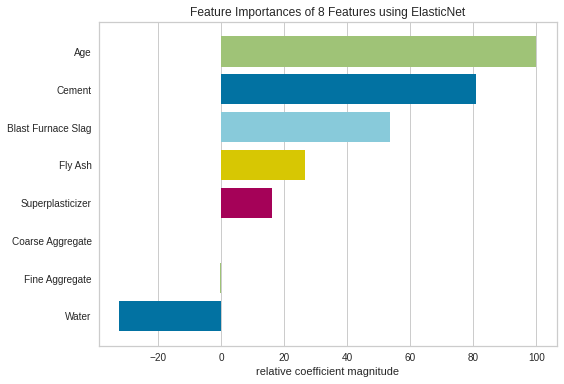

In [39]:
feature_importances(ElasticNet(alpha=0.01, l1_ratio=0.5), X, y);

## Splitting data in train and test sets 

In [40]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

## Modelling

### Model building

##### Keras neural network definition

In [41]:
keras.backend.clear_session()
#   neural network architecture: start  
model = Sequential() 
model.add(Dense(len(X.columns.tolist()) + 1 + 2, input_dim=len(X.columns.tolist()), 
          activation='relu')) 
model.add(BatchNormalization()) 
#   model.add(Dense(len(X.columns.tolist()) + 1 + 2, activation='relu')) 
model.add(Dense(1)) 
model.compile(loss='mean_squared_error', optimizer='adam')

##### Early Stopping

In [42]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=20)

### Model fitting

In [43]:
%%time
history = model.fit(X_train, y_train, batch_size=64, epochs=2000, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/2000
11/11 [==============================] - 2s 69ms/step - loss: 2.6170 - val_loss: 2.0058
Epoch 2/2000
11/11 [==============================] - 0s 13ms/step - loss: 2.2286 - val_loss: 1.7834
Epoch 3/2000
11/11 [==============================] - 0s 13ms/step - loss: 1.9418 - val_loss: 1.5755
Epoch 4/2000
11/11 [==============================] - 0s 12ms/step - loss: 1.6363 - val_loss: 1.3896
Epoch 5/2000
11/11 [==============================] - 0s 13ms/step - loss: 1.4815 - val_loss: 1.2347
Epoch 6/2000
11/11 [==============================] - 0s 13ms/step - loss: 1.1908 - val_loss: 1.0932
Epoch 7/2000
11/11 [==============================] - 0s 13ms/step - loss: 1.1143 - val_loss: 0.9910
Epoch 8/2000
11/11 [==============================] - 0s 12ms/step - loss: 0.9038 - val_loss: 0.8893
Epoch 9/2000
11/11 [==============================] - 0s 12ms/step - loss: 0.8016 - val_loss: 0.8069
Epoch 10/2000
11/11 [==============================] - 0s 12ms/step - loss: 0.7199 - val_lo

11/11 [==============================] - 0s 12ms/step - loss: 0.1964 - val_loss: 0.2136
Epoch 82/2000
11/11 [==============================] - 0s 13ms/step - loss: 0.1883 - val_loss: 0.2139
Epoch 83/2000
11/11 [==============================] - 0s 12ms/step - loss: 0.2267 - val_loss: 0.2149
Epoch 84/2000
11/11 [==============================] - 0s 12ms/step - loss: 0.1954 - val_loss: 0.2135
Epoch 85/2000
11/11 [==============================] - 0s 11ms/step - loss: 0.2048 - val_loss: 0.2124
Epoch 86/2000
11/11 [==============================] - 0s 11ms/step - loss: 0.1868 - val_loss: 0.2106
Epoch 87/2000
11/11 [==============================] - 0s 10ms/step - loss: 0.1887 - val_loss: 0.2101
Epoch 88/2000
11/11 [==============================] - 0s 13ms/step - loss: 0.2122 - val_loss: 0.2093
Epoch 89/2000
11/11 [==============================] - 0s 12ms/step - loss: 0.1814 - val_loss: 0.2075
Epoch 90/2000
11/11 [==============================] - 0s 11ms/step - loss: 0.2298 - val_loss: 0

Epoch 161/2000
11/11 [==============================] - 0s 10ms/step - loss: 0.1638 - val_loss: 0.1820
Epoch 162/2000
11/11 [==============================] - 0s 11ms/step - loss: 0.1455 - val_loss: 0.1824
Epoch 163/2000
11/11 [==============================] - 0s 10ms/step - loss: 0.1642 - val_loss: 0.1837
Epoch 164/2000
11/11 [==============================] - 0s 10ms/step - loss: 0.1559 - val_loss: 0.1810
Epoch 165/2000
11/11 [==============================] - 0s 14ms/step - loss: 0.1635 - val_loss: 0.1807
Epoch 166/2000
11/11 [==============================] - 0s 11ms/step - loss: 0.1465 - val_loss: 0.1790
Epoch 167/2000
11/11 [==============================] - 0s 10ms/step - loss: 0.1463 - val_loss: 0.1782
Epoch 168/2000
11/11 [==============================] - 0s 11ms/step - loss: 0.1440 - val_loss: 0.1799
Epoch 169/2000
11/11 [==============================] - 0s 18ms/step - loss: 0.1439 - val_loss: 0.1810
Epoch 170/2000
11/11 [==============================] - 0s 11ms/step - lo

11/11 [==============================] - 0s 12ms/step - loss: 0.1173 - val_loss: 0.1699
Epoch 241/2000
11/11 [==============================] - 0s 11ms/step - loss: 0.1087 - val_loss: 0.1683
Epoch 242/2000
11/11 [==============================] - 0s 11ms/step - loss: 0.1492 - val_loss: 0.1670
Epoch 243/2000
11/11 [==============================] - 0s 10ms/step - loss: 0.1395 - val_loss: 0.1683
Epoch 244/2000
11/11 [==============================] - 0s 10ms/step - loss: 0.1211 - val_loss: 0.1675
Epoch 245/2000
11/11 [==============================] - 0s 11ms/step - loss: 0.1254 - val_loss: 0.1657
Epoch 246/2000
11/11 [==============================] - 0s 10ms/step - loss: 0.1482 - val_loss: 0.1656
Epoch 247/2000
11/11 [==============================] - 0s 12ms/step - loss: 0.1210 - val_loss: 0.1690
Epoch 248/2000
11/11 [==============================] - 0s 17ms/step - loss: 0.1272 - val_loss: 0.1689
Epoch 249/2000
11/11 [==============================] - 0s 16ms/step - loss: 0.1291 - va

#### Keras neural network description

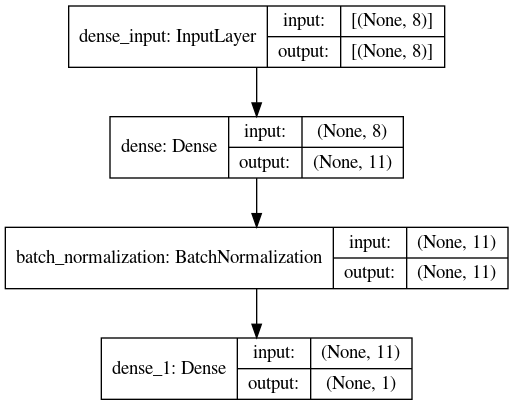

In [44]:
plot_model(model, show_shapes=True, show_layer_names=True)

### Model evaluation

#### Learning curve

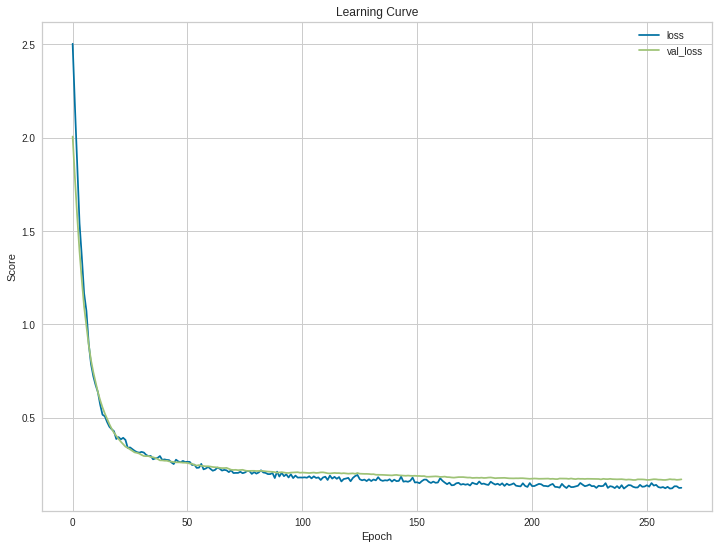

In [45]:
plot_history(history);